In [22]:
import numpy as np
import pandas as pd
import pickle
from idaes import *
#from smt.sampling_methods import LHS
#from idaes.surrogate.pysmo.sampling import HammersleySampling

#from idaes.surrogate.pysmo.sampling import LatinHypercubeSampling

from idaes.core.surrogate.pysmo.sampling import LatinHypercubeSampling
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [28]:
df = pd.read_pickle('../emit_data')
print(df.shape)
print(df.columns.values)

(33820, 11)
['elev med' 'zen' 'slope' 'wv range' 'wv med' 'lat' 'lon' 'date' 'time'
 'orbit' 'scene']


In [29]:
df.head()

,elev med,zen,slope,wv range,wv med,lat,lon,date,time,orbit,scene
0,3.17,49.77,9.00,2.69,0.24,73.462646,21.543773,20220810,034103,22203,000
1,2.75,49.24,3.77,0.16,0.09,73.963529,22.116728,20220810,034115,22203,000
2,2.52,48.71,4.14,0.30,0.12,74.468918,22.687622,20220810,034127,22203,000
3,2.55,48.19,1.84,4.10,0.08,74.978765,23.256703,20220810,034139,22203,000
4,0.96,47.68,2.41,4.99,3.88,75.493399,23.823590,20220810,034151,22203,000


In [30]:
lhs = LatinHypercubeSampling(df, 1500, sampling_type="selection", xlabels = ['elev med', 'zen', 'slope', 'wv range', 'wv med'], \
                             ylabels = ['lat', 'lon'])

Sampling type:  selection 



In [32]:
samples = lhs.sample_points()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [7]:
samples.shape

(766, 7)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
samples.head()

,elev med,zen,slope,wv range,wv med,lat,lon
0,0.0,1.26,1.94,2.33,5.80,71.739953,24.830422
1,0.0,1.79,5.87,0.54,2.57,48.306513,19.972744
2,0.0,2.75,3.62,0.53,4.81,70.676839,25.949266
3,0.0,4.22,2.68,0.39,4.13,30.311020,14.191928
4,0.0,6.07,15.27,3.42,4.21,65.712440,25.618433


C:\Users\vpatro\AppData\Local\Temp\ipykernel_7152\2464672261.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


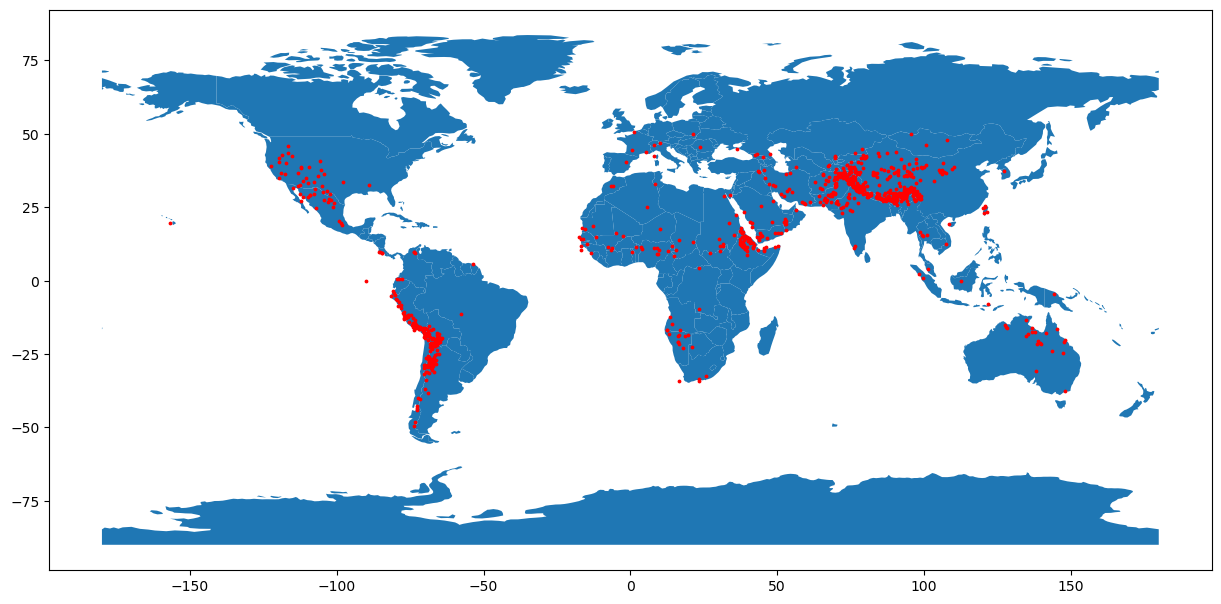

In [21]:
geometry = [Point(xy) for xy in zip(samples['lat'], samples['lon'])]
gdf = GeoDataFrame(samples, geometry = geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax = world.plot(figsize = (15,15)), marker = 'o', color = 'red', markersize = 3);

In [29]:
data_minimum = np.min(df, axis=0)
print(data_minimum)

elev med                                0.0
zen                                    0.22
slope                                   0.0
wv range                                0.0
wv med                                 0.05
lat                             -161.449606
lon                              -51.778556
fid         emit20220810t034103_o22203_s000
dtype: object


In [25]:
row_num = df[df == '35days'].index 

elev med    0.00
zen         1.26
slope       1.94
wv range    2.33
wv med      5.80
Name: 0, dtype: float64

xlabels = ['elev med', 'zen', 'slope', 'wv range', 'wv med']

set_of_labels = xlabels
x_data = data.filter(xlabels).values
print('x data: ', x_data.shape)
data_headers = set_of_labels
print('data headers: ', data_headers)
data_headers_xvars = xlabels
print('data headers xvars: ', data_headers_xvars)
data = data.filter(set_of_labels).values
print('data: ', data.shape)

no_y_vars = x_data.shape[1] - data.shape[1]
print(no_y_vars)
data[:, :no_y_vars]
dist = data[:, :no_y_vars] - data[0]

dist = data - data[0]
l2_norm = np.sqrt(np.sum((dist**2), axis=1))
l2_norm = l2_norm.reshape(l2_norm.shape[0], 1)
distances = np.append(data, l2_norm, 1)
sorted_distances = distances[distances[:, -1].argsort()]
closest_point = sorted_distances[0, :-1]
print(closest_point)

In [87]:
data[0]

array([ 3.17, 49.77,  9.  ,  2.69,  0.24])

In [83]:
dist

array([[  0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [ -0.42,  -0.53,  -5.23,  -2.53,  -0.15],
       [ -0.65,  -1.06,  -4.86,  -2.39,  -0.12],
       ...,
       [ -3.17,  -9.3 ,  -7.01,  -0.94,   2.23],
       [ -2.44, -14.87,  -0.75,   3.26,   2.46],
       [ -2.34, -14.31,  -6.76,   3.21,   1.7 ]])

In [11]:
import lhs

In [91]:
data[:,:-1]

array([[ 3.17, 49.77,  9.  ,  2.69],
       [ 2.75, 49.24,  3.77,  0.16],
       [ 2.52, 48.71,  4.14,  0.3 ],
       ...,
       [ 0.  , 40.47,  1.99,  1.75],
       [ 0.73, 34.9 ,  8.25,  5.95],
       [ 0.83, 35.46,  2.24,  5.9 ]])

In [13]:
lhs_sampler = lhs.LHS(data, 1000, sampling_type="selection", xlabels = ['elev med', 'zen', 'slope', 'wv range', 'wv med'])

AttributeError: 'LHS' object has no attribute 'sampling_type'

In [10]:
samples = lhs.sample_points()

ValueError: operands could not be broadcast together with shapes (33820,0) (5,) 